# Analysis of Local Minima Sharpness in Deep Neural Networks

_Short description_

## Setup

You can download the dataset (python version) on: https://www.cs.toronto.edu/~kriz/cifar.html

For each training run we save the information (loss and test loss across epochs) in a tensorboard log. You can visualize these tensorboard logs by running the following command in the terminal:

tensorboard --logdir `FOLDER_NAME`

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Use this cell for training with Colab GPU:

# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/INSERT_PATH

In [5]:
# TODO: create a requirements.txt file at the end of the project
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.4 MB/s eta 0:00:0000:0100:01


In [2]:
import torch
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

import copy
import pickle


import dataLoader
import train
import sharpness_estimation
import run

In [26]:
# setting seed for reproducibility:
seed = 42

np.random.seed(seed)
torch.manual_seed(seed)

random_number = np.random.randn(5)

print(random_number)
random_number = np.random.randn(5)

print(random_number)

# if we use convolutions later on:
# torch.backends.cudnn.benchmark = True

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
[-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]


## Training runs

**In the following section, we will train a Deep Neural Network on the CIFAR-10 dataset with different values of learning rate and batch size.**

We will later analyze the sharpness of the local minima found by the optimizer in each case.

The architecture we will use is a multi layer perceptron with four fully connected layers, with ReLU activation functions, and a final batch normalization step. We use stochastic gradient descent for the optimization.

In [16]:
# LEARNING_RATES = [1e-4, 5*1e-4, 1e-3, 5*1e-3, 1e-2, 5*1e-2, 1e-1]
# BATCH_SIZES = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 50_000]

LEARNING_RATES = [1e-4, 1e-3, 1e-2]
BATCH_SIZES = [128, 256, 512, 1024]

nb_iterations = 1 # for the confidence intervals
models = dict()

for iter_nb in range(nb_iterations):
    models.update(run.get_model_ready(class_name = 'MLP_1', iteration_number = iter_nb))

# TODO: try with different models later"

All the trained models are saved in the folder `X`

## Experiment 1: varying batch size

[1.518985909158364, 1.734354700153321, 1.7299000282072647, 1.7086057023968175, 1.727720212008916]
[1.5345671722088754, 1.7077174512802065, 1.7043229176767916, 1.7040818534914404, 1.7452635012122988]
[1.521870396049004, 1.7184886826063692, 1.7085139350673928, 1.7193449077302032, 1.7327890341901406]
[1.5230900812604837, 1.6796925529082118, 1.699291750470847, 1.7022874296404422, 1.6919143337925524]
Batch size [128, 256, 512, 1024] [0.20615935325622559, 0.1807793378829956, 0.1979137659072876, 0.17020630836486816]


/Users/robin/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/robin/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/robin/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/robin/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

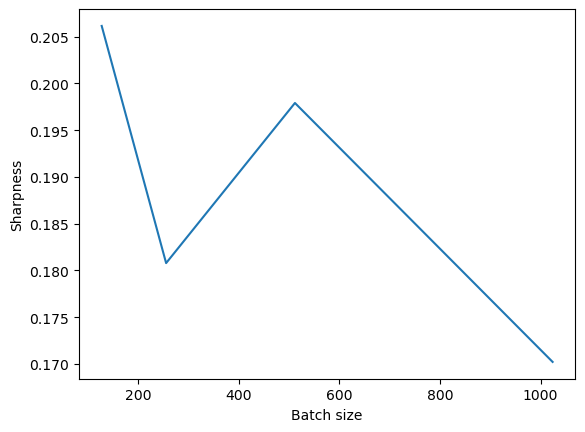

In [18]:
# TODO: plot results, analysis
run.show_results(effect = BATCH_SIZES, 
                 models = models,
                 effect_name = 'Batch size',
                 model_class_name = 'MLP_1',
                 optimizer='AdaGrad'
                 )

## Experiment 2: varying learning rate

In [9]:
# TODO: plot results, analysis
run.show_results(effect = LEARNING_RATES, 
                 models = models,
                 effect_name = 'Learning rate',
                 model_class_name = 'MLP_1'
                 )

## Experiment 3: different gradient descent algorithms

In [ ]:
# TODO: code to run experiment, plot results, analysis

## Conclusion

_Summarize key findings and their implications in NN optimization. Discuss limitations and potential avenues for future research._